## Importation des libairies

In [1]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
import seaborn as sns
# Importation de la classe `StandardScaler` pour normaliser les données
from sklearn.preprocessing import StandardScaler
# Importation du modèle de l'arbre de décision
from sklearn.tree import DecisionTreeClassifier
# Importation de la fonction `train_test_split` pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
# Importation de la fonction `accuracy_score` pour évaluer la précision du modèle
from sklearn.metrics import accuracy_score

## Lecture du dataset

In [3]:
diabete = pd.read_csv("diabetes.csv")
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Prétraitement des données :

### Données manquantes :

In [6]:
diabete.isnull().sum() #on compte le nombre de valeurs nulles (ou NaN, Not a Number) dans la série diabete

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Données dupliquées :

In [7]:
diabete.duplicated().sum()

0

### Compter les 0 dans dataset :

In [8]:
(diabete == 0 ).sum() #on compte le nombre de valeurs dans la série diabete qui sont égales à zéro.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### On remplace les valeurs nulles par la moyenne de chaque valeur

In [9]:
diabete['Insulin'].replace(0 ,diabete["Insulin"].mean() , inplace=True)
diabete['SkinThickness'].replace(0, diabete["SkinThickness"].mean() ,inplace=True)
diabete['BloodPressure'].replace(0, diabete["BloodPressure"].mean() ,inplace=True)
diabete['Pregnancies'].replace(0, diabete["Pregnancies"].mean() , inplace=True)
diabete['Glucose'].replace(0, diabete["Glucose"].mean() , inplace=True)
diabete['BMI'].replace(0, diabete["BMI"].mean() , inplace=True)
(diabete == 0 ).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

###  Division des données:

In [10]:
# Séparation des variables explicatives (features) (toutes les colonnes sauf "Outcome") et de la variable cible (label)
X = diabete.drop("Outcome", axis=1) # X sont les varibales explicatives (features)
Y = diabete["Outcome"]  # Outcome est le variable que nous cerchons a prédire c'est le variable cible (label)

In [11]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2,random_state=20) 

In [12]:
# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)
print("Dimensions de l'ensemble d'entraînement (labels) :", y_train.shape)
print("Dimensions de l'ensemble de test (labels) :", y_test.shape)

Dimensions de l'ensemble d'entraînement : (614, 8)
Dimensions de l'ensemble de test : (154, 8)
Dimensions de l'ensemble d'entraînement (labels) : (614,)
Dimensions de l'ensemble de test (labels) : (154,)


### Normalisation des données

In [13]:
# Standardisation des données en utilisant la classe StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Calcul des moyennes et écarts-types pour normaliser les données d'entraînement
X_test = scaler.transform(X_test)  # Application de la même transformation aux données de test

### Entrainement du model

In [14]:
# Initialisation du modèle de l'arbre de décision avec un nombre maximal de feuilles et un état aléatoire fixe
model = DecisionTreeClassifier(max_leaf_nodes=30,random_state=0)
# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)

### Evaluation du modele

In [15]:
# Prédiction des labels pour les données de test
prediction = model.predict(X_test)
# Évaluation de la précision du modèle en comparant les prédictions aux vraies valeurs des labels des données de test
accuracy = accuracy_score(y_test, prediction)
print("La précision du model est ", accuracy *100 ,"%")

La précision du model est  74.67532467532467 %


#### Évaluation de la performance du modèle

Text(0.5, 1.0, 'Confusion matrix')

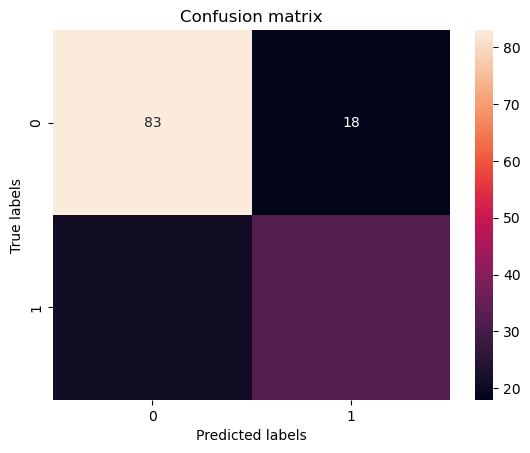

In [21]:
# Prédiction sur les données de test
y_predict_test = model.predict(X_test)
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_predict_test)
# Création de la heatmap pour visualiser la matrice de confusion avec les annotations
sns.heatmap(cm, annot=True)
# Ajout de labels et de titres
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')

In [22]:
# Rapport de classification pour évaluer la performance du modèle
# La fonction classification_report fournit une évaluation détaillée de la précision, du rappel, du score F1, etc.
print("Rapport de classification :\n", classification_report(y_test, y_predict_test))

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       101
           1       0.64      0.60      0.62        53

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



><ul>
    <font size="3"><b>Précision (Precision) :</b></font> La précision mesure la proportion de vrais positifs parmi toutes les observations prédites comme positives.<br>
    <font size="3"><b>Rappel (Recall) :</b></font> Le rappel mesure la proportion de vrais positifs parmi toutes les observations réellement positives. Il est également connu sous le nom de sensibilité.<br>
    <font size="3"><b>Score F1 (F1 Score) :</b></font> Le score F1 est la moyenne pondérée de la précision et du rappel.Il s'agit d'une mesure de la précision globale du modèle, en tenant compte à la fois des faux positifs et des faux négatifs.<br>
    <font size="3"><b>Support : </b></font>Le support est le nombre total d'échantillons pour chaque classe dans les données de test. Il s'agit simplement du nombre d'occurrences de chaque classe dans les données de test.

### Interpretation des résultats
* Sur tous les tests des personnes qui ont un résultat négatif, 80 % sont prédites correctement.
* Sur tous les tests des personnes qui ont un résultat positif, 64 % sont prédites correctement.

## Prédiction

In [23]:
diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
print(model.predict([[3, 130, 50, 35, 60, 38.5, 0.67, 38]]))

[0]


In [25]:
print(model.predict([[7, 1, 50, 35, 60, 38.5, 0.67, 38]]))

[1]


## Graphe de l'arbre de décision 

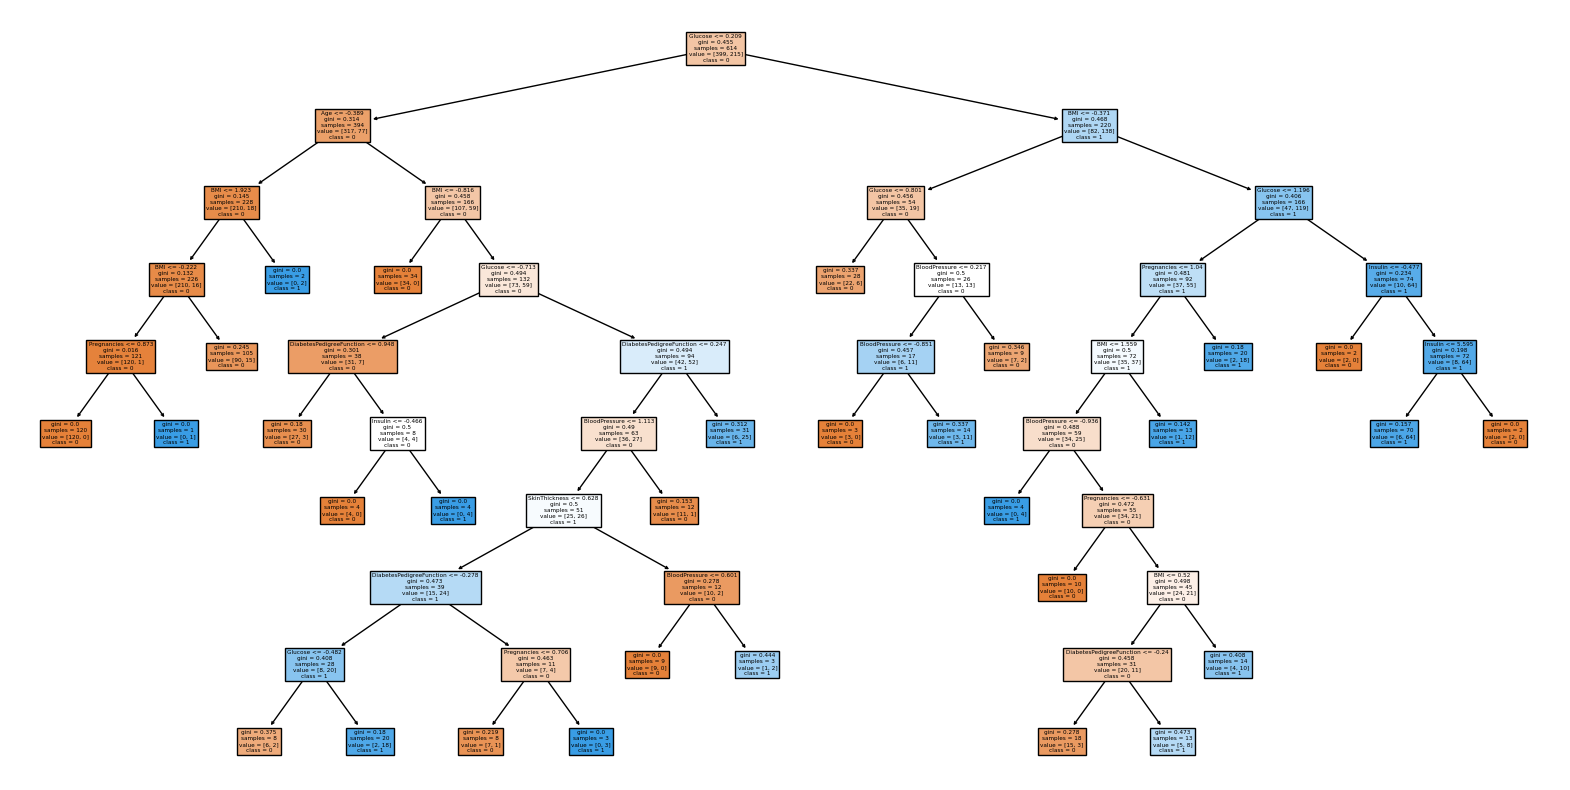

In [26]:
from sklearn.tree import plot_tree

# Affichage de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot', feature_names=X.columns, class_names=['absence de diabete', 'présence de diabete'])

In [37]:
import graphviz

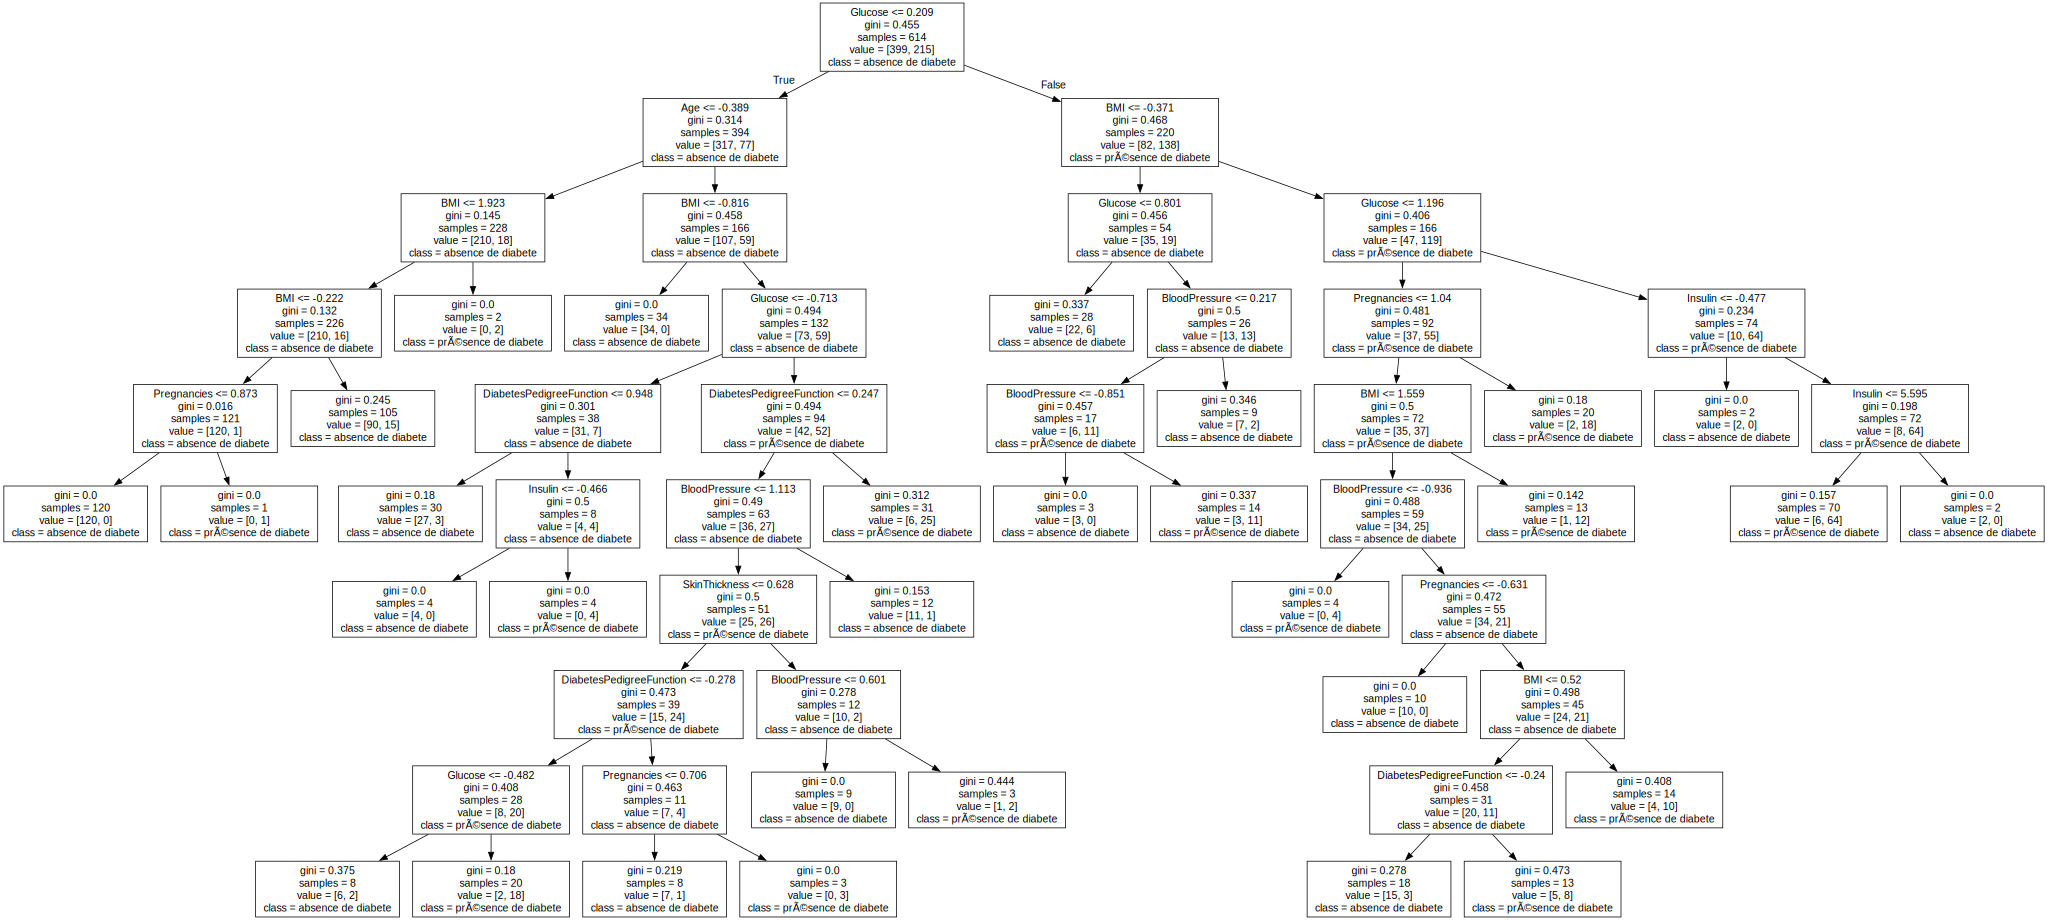

In [21]:
with open('model.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

><ul>
    <font size="3"><b>Le "Gini Impurity" </b></font> est une mesure de l'impureté d'un nœud dans un arbre de décision.Il est calculé comme la probabilité qu'une observation choisie au hasard soit mal classée si elle était classée au hasard selon la distribution des étiquettes dans le nœud. Un nœud est considéré comme "pur" (impureté de Gini égale à zéro) s'il ne contient que des échantillons de la même classe, et "impur" si les échantillons sont répartis entre plusieurs classes. <br>
    <font size="3"><b>La "value" </b></font> dans le contexte des arbres de décision représente la distribution des étiquettes de classe dans un nœud donné.
.

### Sauvegarder le modèle : format pickle

pickle est un module Python intégré qui implémente des protocoles binaires pour sérialiser ou désérialiser une structure d'objet.
Il permet de stocker et de restaurer un objet Python tel quel sans aucune manipulation supplémentaire.

In [22]:
import pickle

In [23]:
with open ('classifier.pkl','wb') as file:    # wb : write binary
    pickle.dump(model,file)

In [24]:
"""import pickle
    with open('classifier.pkl','rb') as file:
       clf = pickle.load(file)
    predictions = clf.predict([[7, 1, 50, 35, 60, 38.5, 0.67, 38]])"""  

"import pickle\n    with open('classifier.pkl','rb') as file:\n       clf = pickle.load(file)\n    predictions = clf.predict([[7, 1, 50, 35, 60, 38.5, 0.67, 38]])"

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7077922077922078


In [33]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       101
           1       0.58      0.57      0.57        53

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [34]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[79 22]
 [23 30]]
